## LSTMモデル
- Keras使用

In [1]:
# Google Driveをマウントする
from google.colab import drive


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import math

from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

# ライブラリーのインポート
import numpy
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
# fix random seed
numpy.random.seed(10)

In [5]:
# load the dataset
dataframe = pd.read_csv("drive/MyDrive/data/AirPassengers.csv", usecols=[1])
dataset = dataframe.values

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size : len(dataset), :]

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(trainX, trainY, epochs=1000, batch_size=128, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/1000
1/1 - 3s - loss: 0.0735
Epoch 2/1000
1/1 - 0s - loss: 0.0726
Epoch 3/1000
1/1 - 0s - loss: 0.0717
Epoch 4/1000
1/1 - 0s - loss: 0.0707
Epoch 5/1000
1/1 - 0s - loss: 0.0698
Epoch 6/1000
1/1 - 0s - loss: 0.0689
Epoch 7/1000
1/1 - 0s - loss: 0.0680
Epoch 8/1000
1/1 - 0s - loss: 0.0671
Epoch 9/1000
1/1 - 0s - loss: 0.0662
Epoch 10/1000
1/1 - 0s - loss: 0.0654
Epoch 11/1000
1/1 - 0s - loss: 0.0645
Epoch 12/1000
1/1 - 0s - loss: 0.0637
Epoch 13/1000
1/1 - 0s - loss: 0.0628
Epoch 14/1000
1/1 - 0s - loss: 0.0620
Epoch 15/1000
1/1 - 0s - loss: 0.0611
Epoch 16/1000
1/1 - 0s - loss: 0.0603
Epoch 17/1000
1/1 - 0s - loss: 0.0595
Epoch 18/1000
1/1 - 0s - loss: 0.0587
Epoch 19/1000
1/1 - 0s - loss: 0.0579
Epoch 20/1000
1/1 - 0s - loss: 0.0572
Epoch 21/1000
1/1 - 0s - loss: 0.0564
Epoch 22/1000
1/1 - 0s - loss: 0.0556
Epoch 23/1000
1/1 - 0s - loss: 0.0549
Epoch 24/1000
1/1 - 0s - loss: 0.0541
Epoch 25/1000
1/1 - 0s - loss: 0.0534
Epoch 26/1000
1/1 - 0s - loss: 0.0527
Epoch 27/1000
1/1 - 0

Train Score: 23.83 RMSE
Test Score: 50.51 RMSE


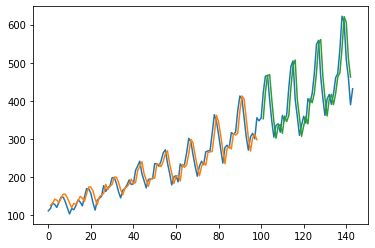

In [9]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print("Test Score: %.2f RMSE" % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back : len(trainPredict) + look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[
    len(trainPredict) + (look_back * 2) + 1 : len(dataset) - 1, :
] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()